In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install tensorflow-gpu

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.applications.mobilenet_v3 import MobileNetV3Small, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import os

In [ ]:
train_path = '/content/drive/MyDrive/TrainTestValidationAugmented/train'
valid_path = '/content/drive/MyDrive/TrainTestValidationAugmented/val'
test_path = '/content/drive/MyDrive/TrainTestValidationSplitFinal/test'

train_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(train_path, target_size=(224,224), batch_size=10)
valid_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(valid_path, target_size=(224,224), batch_size=6)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(test_path, target_size=(224,224), batch_size=6)

Found 1567 images belonging to 2 classes.
Found 239 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.models import Sequential

In [ ]:
resnet_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(256,activation='relu')(x) #dense layer 2
x=Dense(128,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='sigmoid')(x)

model= Model(inputs = base_model.input, outputs=preds)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_5 (Rescaling)        (None, None, None,   0           ['input_14[0][0]']               
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling_5[0][0]']            
                                16)                                                         

In [ ]:
classes = {0: ('HZVFinal','herpes zoster'),
           1:('Monkeypox Images Phase 2' , 'mpox')}

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
epochs = 20

optimizer = Adam(learning_rate=.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
hist = model.fit(train_generator, validation_data=valid_generator, epochs=epochs, shuffle=True)

Epoch 1/20
157/157 [==============================] - 389s 2s/step - loss: 0.4088 - accuracy: 0.7977 - val_loss: 0.7007 - val_accuracy: 0.6318
Epoch 2/20
157/157 [==============================] - 90s 571ms/step - loss: 0.2024 - accuracy: 0.9241 - val_loss: 0.4371 - val_accuracy: 0.7908
Epoch 3/20
157/157 [==============================] - 89s 569ms/step - loss: 0.1209 - accuracy: 0.9541 - val_loss: 0.4650 - val_accuracy: 0.8117
Epoch 4/20
157/157 [==============================] - 92s 582ms/step - loss: 0.0945 - accuracy: 0.9617 - val_loss: 0.5735 - val_accuracy: 0.8075
Epoch 5/20
157/157 [==============================] - 91s 580ms/step - loss: 0.0912 - accuracy: 0.9662 - val_loss: 0.5387 - val_accuracy: 0.8285
Epoch 6/20
157/157 [==============================] - 86s 547ms/step - loss: 0.0814 - accuracy: 0.9655 - val_loss: 0.7676 - val_accuracy: 0.7657
Epoch 7/20
157/157 [==============================] - 87s 556ms/step - loss: 0.0580 - accuracy: 0.9757 - val_loss: 0.2673 - val_accu

In [ ]:
hist.history

{'loss': [0.40875443816185,
  0.2023710459470749,
  0.1208934485912323,
  0.0944521501660347,
  0.09121225774288177,
  0.0813915878534317,
  0.058001063764095306,
  0.03193766251206398,
  0.031067490577697754,
  0.03755291551351547,
  0.03320987895131111,
  0.03995374217629433,
  0.0364251472055912,
  0.018264086917042732,
  0.02745632641017437,
  0.03045402280986309,
  0.014031966216862202,
  0.010026355274021626,
  0.025640644133090973,
  0.027476219460368156],
 'accuracy': [0.7977026104927063,
  0.924058735370636,
  0.9540523290634155,
  0.9617102742195129,
  0.9661774039268494,
  0.965539276599884,
  0.9757498502731323,
  0.9878749251365662,
  0.9885131120681763,
  0.9878749251365662,
  0.9891512393951416,
  0.9859604239463806,
  0.9885131120681763,
  0.993618369102478,
  0.9917038679122925,
  0.9891512393951416,
  0.993618369102478,
  0.9961710572242737,
  0.9891512393951416,
  0.9897894263267517],
 'val_loss': [0.7007150053977966,
  0.4371316134929657,
  0.46500974893569946,
  0.

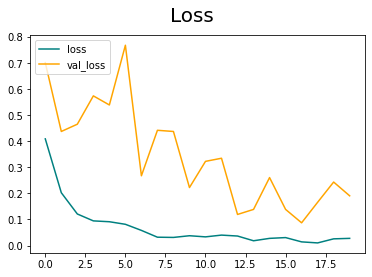

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

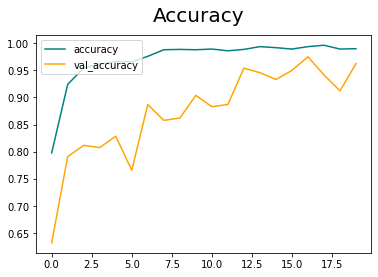

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','resnet50.h5'))

NameError: ignored

In [ ]:
print("Evaluate on test data")
results = model.evaluate(test_generator, batch_size=6)
print("test loss, test acc:", results)


Evaluate on test data
10/10 [==============================] - 11s 1s/step - loss: 0.1703 - accuracy: 0.9310
test loss, test acc: [0.17027825117111206, 0.931034505367279]


In [ ]:
! tensorflowjs_converter --input_format=keras /tmp/resnet50.h5 /tmp/tfjs_model

/bin/bash: tensorflowjs_converter: command not found


In [ ]:
!mkdir model

In [ ]:
!tensorflowjs_converter --input_format keras resnet50.h5 model/

/bin/bash: tensorflowjs_converter: command not found


In [ ]:
!zip -r model.zip model

  adding: model/ (stored 0%)


In [ ]:
!sudo pip3 install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.1/210.1 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 119.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 KB 12.1 MB/s eta 0:00:00
  Attempting un

In [ ]:
!sudo tensorflowjs_converter

2023-03-04 23:36:34.719591: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-04 23:36:35.862252: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-04 23:36:35.862324: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-04 23:36:35.862336: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [ ]:
!tensorflowjs_converter --input_format=keras '/content/drive/MyDrive/Model Information/resnet50.h5 copy/model.h5' "/content/drive/MyDrive/json"

2023-03-04 23:42:34.064112: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-04 23:42:34.881937: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-04 23:42:34.882018: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-04 23:42:34.882033: W tensorfl

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 781.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 K

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import requests
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model

In [ ]:
model = load_model("resnet50.h5")

In [ ]:
class_names = ['mpox','herpes zoster'] # categories

In [ ]:
def predict_input_image(img):
  img=img.reshape(224,224,3)
  prediction=model.predict(img)[0]
  return {class_names[i]: float(prediction[i]) for i in range(2)}

In [ ]:
image = gr.inputs.Image(shape = (224, 224)) # initializing the input component
label = gr.outputs.Label(num_top_classes = 2) # initializing the output component

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [ ]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_input_image, inputs=image, outputs=label,interpretation='default').launch(share=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)



Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9dbc16c727e8be60a7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [ ]:
def predict_image(inp):
  inp=inp.reshape((-1,224, 224,3))
  prediction = model.predict(inp).tolist()[0]
  class_names = ["Monkeypox", "Herpes Zoster"]
  return {class_names[i]: float(prediction[i]) for i in range(2)}

In [ ]:
num_classes = 2

In [ ]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(share='True')


/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a520fa4c8c973e2d57.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
